In [2]:
import yfinance as yf

# Extraction des données boursières de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Réinitialisation de l'index
tesla_data.reset_index(inplace=True)

# Affichage des cinq premières lignes
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# URL containing Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Sending a request to fetch the webpage content, with added headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Adding a delay to avoid overloading the server
time.sleep(2)

# Extracting the revenue table
tables = soup.find_all("table")
# Check if any tables were found
if tables:
    tesla_revenue = pd.read_html(str(tables[0]))[0]  # Selecting the relevant table

    # Cleaning the data
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue.dropna()
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

    # Display the last five rows
    print(tesla_revenue.tail())
else:
    print("No tables found on the page. The website might be blocking the request or the table structure has changed.")

    Date  Revenue
11  2013   2013.0
12  2012    413.0
13  2011    204.0
14  2010    117.0
15  2009    112.0


<ipython-input-4-5598c233a12b>:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[0]))[0]  # Selecting the relevant table


In [5]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# URL containing GameStop's financial data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL, adding headers and handling potential 429 errors
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

while True:  # Loop until a successful response is received
    response = requests.get(url, headers=headers)
    if response.status_code != 429:  # Check for "Too Many Requests" error
        break
    print("Received a 429 error. Waiting 5 seconds before retrying...")
    time.sleep(5)  # Wait for 5 seconds before retrying

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the financial data table
# The original selector was likely outdated or incorrect.
# This updated selector targets all tables within the 'div' with id 'Col1-1-Financials-Proxy'
table = soup.select_one("#Col1-1-Financials-Proxy table")

# Check if a table was found before proceeding
if table:
    # Convert the HTML table into a pandas DataFrame
    gme_revenue = pd.read_html(str(table))[0]

    # Display the last 5 rows of the DataFrame
    print(gme_revenue.tail())
else:
    print("No tables found on the page. The website might be blocking the request or the table structure has changed.")

No tables found on the page. The website might be blocking the request or the table structure has changed.


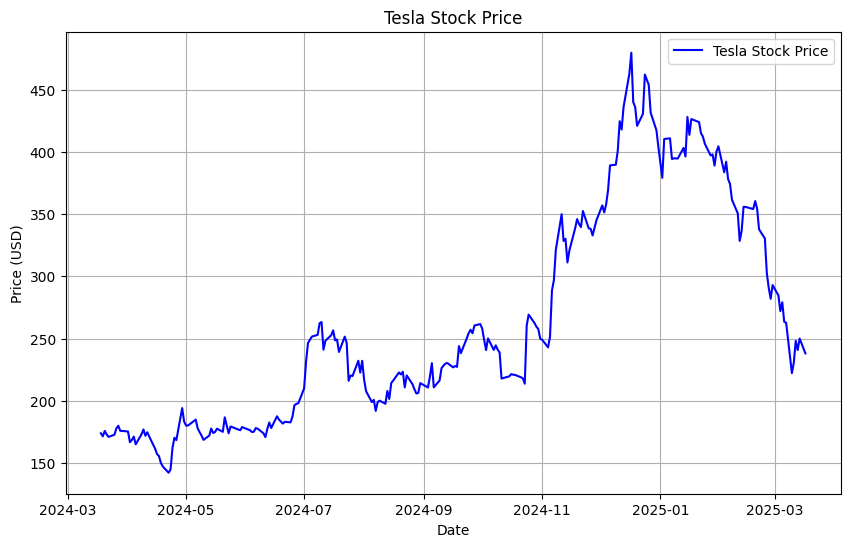

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data for the last 1 year
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")

# Function to plot the graph
def make_graph(data, title="Tesla Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label="Tesla Stock Price", color="blue")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the make_graph function with the Tesla stock data
make_graph(tesla_data)


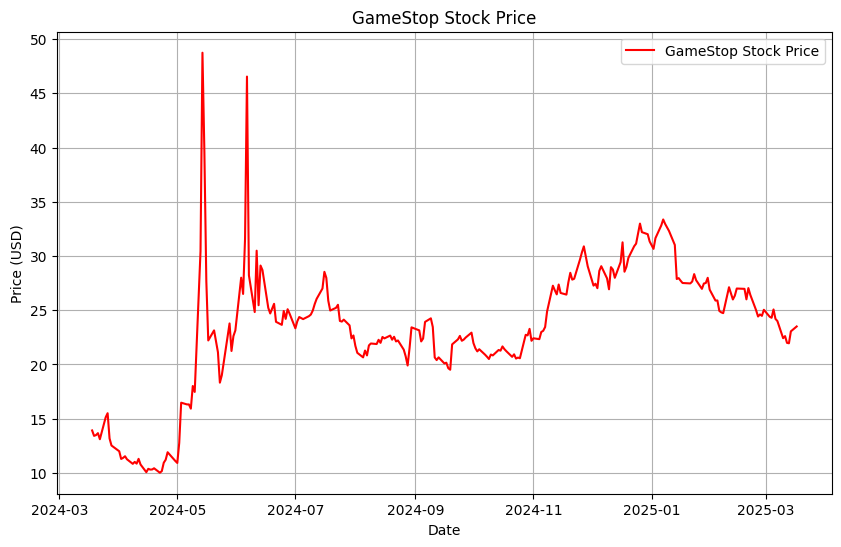

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data for the last 1 year
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")

# Function to plot the graph
def make_graph(data, title="GameStop Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label="GameStop Stock Price", color="red")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the make_graph function with the GameStop stock data
make_graph(gme_data)
